In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca Data ADIDAS

In [6]:
shoes_data=pd.read_csv('/content/drive/MyDrive/archive/shoes_fact.csv')
shoes_data.head()

,Unnamed: 0,id,price,category,size,availability,date,country_code
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE


In [7]:
shoes_dim=pd.read_csv('/content/drive/MyDrive/archive/shoes_dim.csv')
shoes_dim.head()

,id,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,HP9426,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core Black,Core Black,Beam Green
2,JQ2552,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Lucid Red
3,JI1896,NY 90 Schuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Crystal White
4,IE8976,Ultraboost 1.0 Laufschuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Grey One,Grey Three,Grey One


In [8]:
country_dim=pd.read_csv('/content/drive/MyDrive/archive/country_dim.csv')
country_dim.head()

,country_code,currency,shoe_metric
0,DE,euro,eu
1,US,usd,usa
2,BE,euro,eu
3,UK,pounds,uk


# Menggabungkan Dataset

In [9]:

# Merge shoes_data with shoes_dim on 'id'
shoes_data_enriched = pd.merge(shoes_data, shoes_dim, on='id', how='left')

# Merge shoes_data_enriched with country_dim on 'country_code'
full_data = pd.merge(shoes_data_enriched, country_dim, on='country_code', how='left')

# Display the first few rows of the enriched dataset to confirm the merge
full_data.head()


,Unnamed: 0,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
1,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE,Breaknet 2.0 Shoes,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
2,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
3,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE,Breaknet 2.0 Shoes,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu
4,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White,euro,eu


# Visualisasi

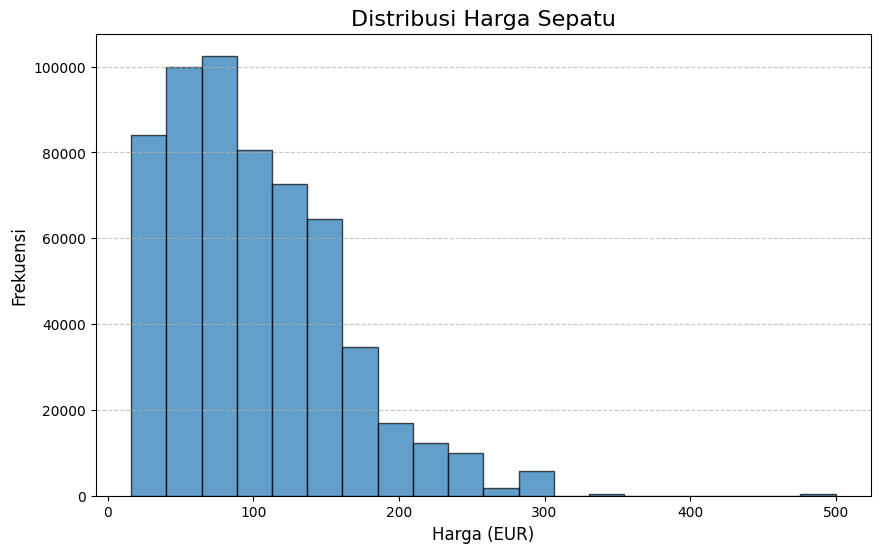

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(full_data['price'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribusi Harga Sepatu', fontsize=16)
plt.xlabel('Harga (EUR)', fontsize=12)
plt.ylabel('Frekuensi', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

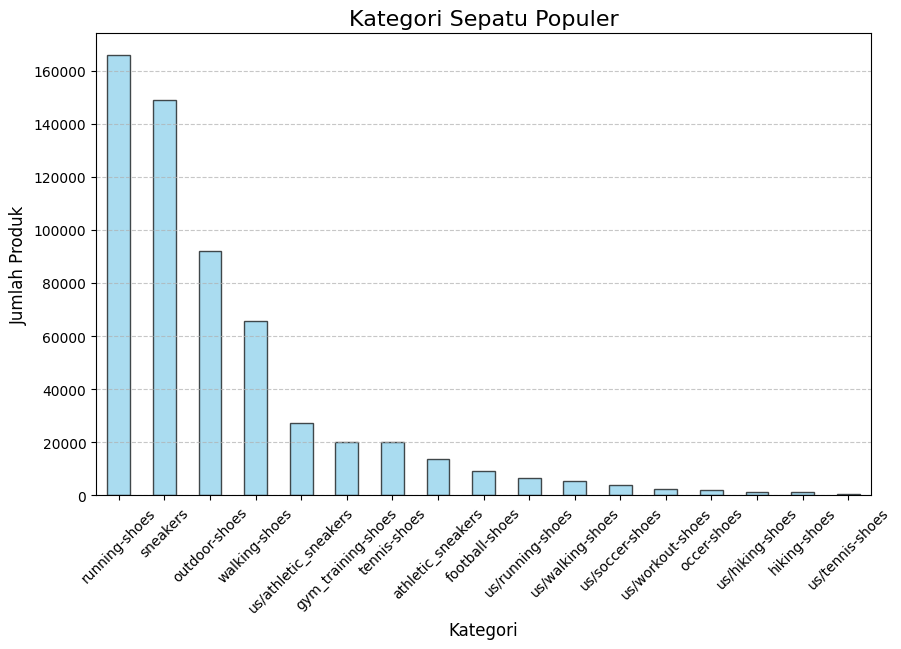

In [11]:
plt.figure(figsize=(10, 6))
full_data['category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='k', alpha=0.7)
plt.title('Kategori Sepatu Populer', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

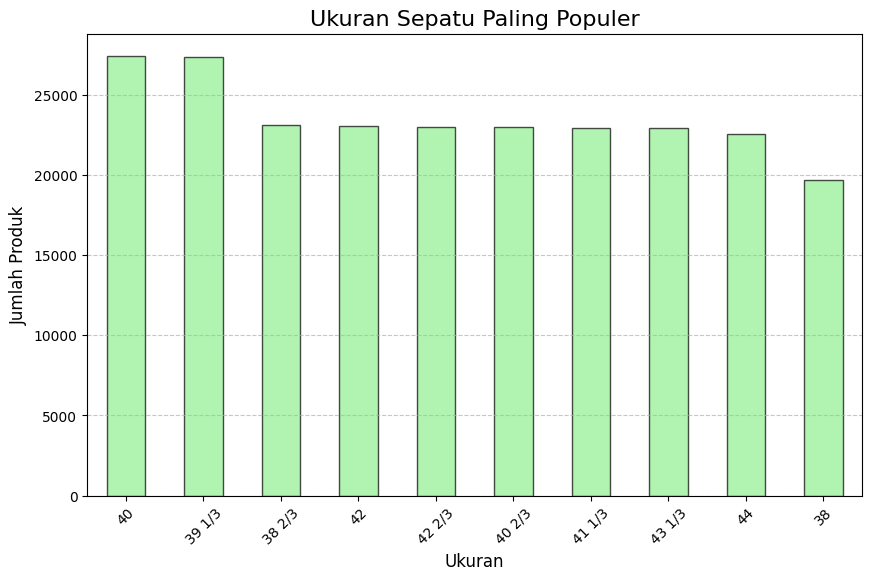

In [12]:
plt.figure(figsize=(10, 6))
full_data['size'].value_counts().head(10).plot(kind='bar', color='lightgreen', edgecolor='k', alpha=0.7)
plt.title('Ukuran Sepatu Paling Populer', fontsize=16)
plt.xlabel('Ukuran', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

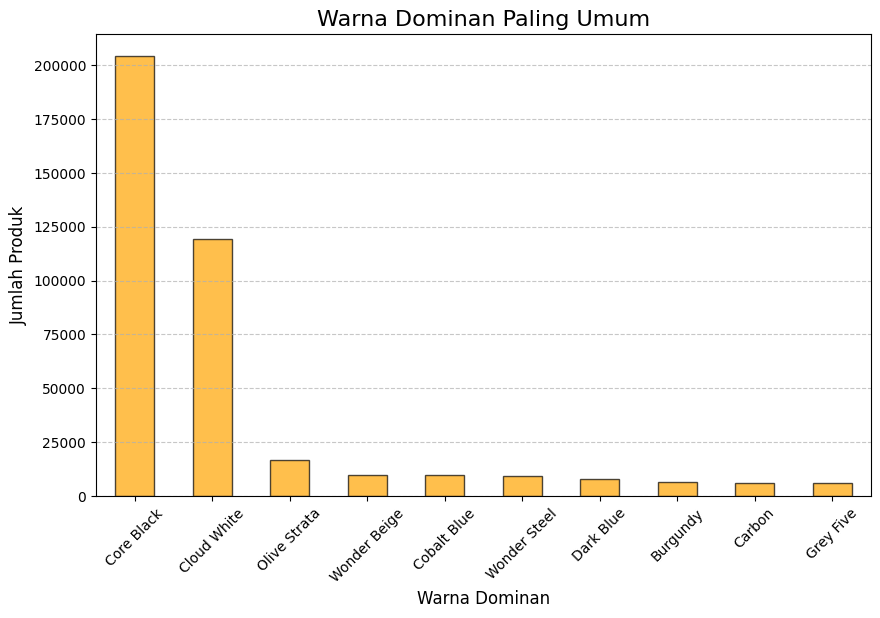

In [13]:
plt.figure(figsize=(10, 6))
full_data['dominant_color'].value_counts().head(10).plot(kind='bar', color='orange', edgecolor='k', alpha=0.7)
plt.title('Warna Dominan Paling Umum', fontsize=16)
plt.xlabel('Warna Dominan', fontsize=12)
plt.ylabel('Jumlah Produk', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Analisis Deskriptif

In [14]:
import pandas as pd

# Menghitung analisis deskriptif
analisis_deskriptif = {}

# Distribusi Harga
analisis_deskriptif['Distribusi Harga'] = {
    'Rata-rata Harga': full_data['price'].mean(),
    'Median Harga': full_data['price'].median(),
    'Variasi Harga': full_data['price'].std(),
}

# Kategori Sepatu Populer
analisis_deskriptif['Kategori Populer'] = full_data['category'].value_counts().idxmax()

# Dominasi Warna
analisis_deskriptif['Warna Dominan'] = full_data['dominant_color'].value_counts().idxmax()

# Ketersediaan Ukuran
analisis_deskriptif['Ukuran Paling Tersedia'] = full_data['size'].value_counts().idxmax()

# Distribusi Berdasarkan Gender
gender_distribution = full_data['gender'].value_counts()
analisis_deskriptif['Distribusi Gender'] = {
    'Unisex': gender_distribution.get('U', 0),
    'Pria': gender_distribution.get('M', 0),
    'Wanita': gender_distribution.get('F', 0),
}

# Distribusi Berdasarkan Negara
country_distribution = full_data['country_code'].value_counts()
analisis_deskriptif['Distribusi Negara'] = country_distribution.to_dict()

# Menampilkan hasil analisis deskriptif
for key, value in analisis_deskriptif.items():
    print(f"{key}:\n{value}\n")


Distribusi Harga:
{'Rata-rata Harga': 101.85819746892393, 'Median Harga': 90.0, 'Variasi Harga': 58.96850259155343}

Kategori Populer:
running-shoes

Warna Dominan:
Core Black

Ukuran Paling Tersedia:
40

Distribusi Gender:
{'Unisex': 226751, 'Pria': 80294, 'Wanita': 0}

Distribusi Negara:
{'DE': 448220, 'US': 74089, 'BE': 57747, 'UK': 6730}



# Business insight

In [15]:
# Business Insights Generation

# Business Insight 1: Gender-Specific Preferences
def gender_specific_preferences(data):
    gender_dist = data['gender'].value_counts()
    insights = {
        'Unisex Products': gender_dist.get('U', 0),
        'Male-Specific Products': gender_dist.get('M', 0),
        'Female-Specific Products': gender_dist.get('F', 0)
    }
    return insights

# Business Insight 2: Localization by Country
def localization_by_country(data):
    country_dist = data['country_code'].value_counts()
    insights = {
        'Top Country': country_dist.idxmax(),
        'Country Distribution': country_dist.to_dict()
    }
    return insights

# Business Insight 3: Popular Categories
def popular_categories(data):
    category_dist = data['category'].value_counts()
    insights = {
        'Most Popular Category': category_dist.idxmax(),
        'Category Distribution': category_dist.to_dict()
    }
    return insights

# Business Insight 4: Price Sensitivity
def price_sensitivity(data):
    price_mean = data['price'].mean()
    price_median = data['price'].median()
    high_price_products = data[data['price'] > price_mean]
    low_price_products = data[data['price'] <= price_mean]
    insights = {
        'Average Price': price_mean,
        'Median Price': price_median,
        'High Price Products Count': high_price_products.shape[0],
        'Low Price Products Count': low_price_products.shape[0]
    }
    return insights

# Generate Insights
def generate_insights(data):
    insights = {
        'Gender-Specific Preferences': gender_specific_preferences(data),
        'Localization by Country': localization_by_country(data),
        'Popular Categories': popular_categories(data),
        'Price Sensitivity': price_sensitivity(data)
    }
    return insights

# Generate insights from the full dataset
business_insights = generate_insights(full_data)

# Display insights
for insight, details in business_insights.items():
    print(f"{insight}:\n{details}\n")


Gender-Specific Preferences:
{'Unisex Products': 226751, 'Male-Specific Products': 80294, 'Female-Specific Products': 0}

Localization by Country:
{'Top Country': 'DE', 'Country Distribution': {'DE': 448220, 'US': 74089, 'BE': 57747, 'UK': 6730}}

Popular Categories:
{'Most Popular Category': 'running-shoes', 'Category Distribution': {'running-shoes': 165741, 'sneakers': 148912, 'outdoor-shoes': 92095, 'walking-shoes': 65545, 'us/athletic_sneakers': 27159, 'gym_training-shoes': 20257, 'tennis-shoes': 20002, 'athletic_sneakers': 13656, 'football-shoes': 9193, 'us/running-shoes': 6602, 'us/walking-shoes': 5584, 'us/soccer-shoes': 3965, 'us/workout-shoes': 2480, 'occer-shoes': 2151, 'us/hiking-shoes': 1452, 'hiking-shoes': 1452, 'us/tennis-shoes': 540}}

Price Sensitivity:
{'Average Price': 101.85819746892393, 'Median Price': 90.0, 'High Price Products Count': 242034, 'Low Price Products Count': 344752}



In [16]:
full_data.to_csv('shoes_data.csv', index=False)